In [2]:
# DATA READING BLOCK
import numpy as np
import matplotlib.pyplot as plt
import csv
from PIL import Image
import cv2
from datetime import datetime as dt

def readTrafficSigns(rootpath):
    images = []
    labels = []
    Roi_X1 = []
    Roi_Y1 = []
    Roi_X2 = []
    Roi_Y2 = []

    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader)
        for row in gtReader:
            images.append(cv2.imread(prefix + row[0]))
            Roi_X1.append(int(row[3]))
            Roi_Y1.append(int(row[4]))
            Roi_X2.append(int(row[5]))
            Roi_Y2.append(int(row[6]))
            labels.append(row[7])
        gtFile.close()
    return images, labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2
images,labels, Roi_X1, Roi_Y1, Roi_X2, Roi_Y2 = readTrafficSigns('C:/Users/Pradeep/PycharmProjects/IcvTask1/GTSRB/Final_Training/Images/')  

print('Read '+str(len(images))+' images successfully')

Read 39209 images successfully


In [3]:
print("timestamp =", dt.fromtimestamp(dt.timestamp(dt.now())))

timestamp = 2019-06-03 00:02:25.500557


In [39]:
print(labels[0])

0


In [4]:
for i in range (len(labels)):
    label = int(labels[i])
    
    if label<9:
        labels[i] = '0'
    elif label == 13 :
        labels[i] = '1'
    elif label == 11 :
        labels[i] = '2'
    elif label == 12 :
        labels[i]= '3'
    elif True:
        labels[i] = '4'

print(labels)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [5]:
# CROPPIMNG IMAGES WITH ROI BLOCK
cropped_images = []
for im in range(len(images)):
    cropped_images.append(images[im][Roi_X1[im]:Roi_X2[im]+1,Roi_Y1[im]:Roi_Y2[im]+1])
    
print('Cropped / Fitltered '+str(len(images))+' images successfully')


Cropped / Fitltered 39209 images successfully


In [6]:
'''import cv2
gray = cv2.cvtColor(images[5], cv2.COLOR_BGR2GRAY)

gray = cv2.resize(gray,(32,32))

sift = cv2.xfeatures2d.SIFT_create()
kp, discs = sift.detectAndCompute(gray, None)
print(len(discs))'''

'import cv2\ngray = cv2.cvtColor(images[5], cv2.COLOR_BGR2GRAY)\n\ngray = cv2.resize(gray,(32,32))\n\nsift = cv2.xfeatures2d.SIFT_create()\nkp, discs = sift.detectAndCompute(gray, None)\nprint(len(discs))'

In [7]:
# CLAHE ENHANCEMENT ON THE OCV IMAGES
import cv2

clahe = cv2.createCLAHE()
enhanced_images = []
for im in cropped_images:
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    enhanced_images.append(clahe.apply(im))

print('enhanced '+str(len(enhanced_images))+' images successfully')


enhanced 39209 images successfully


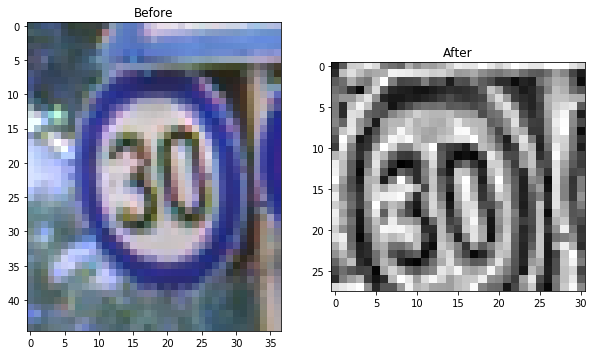

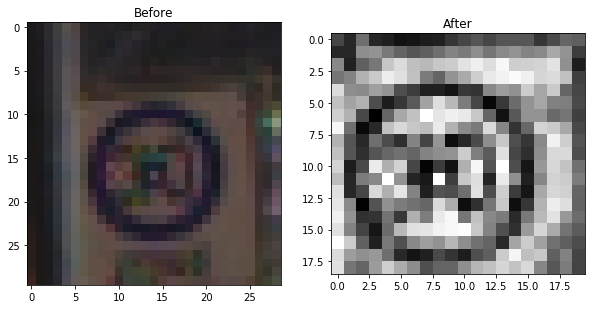

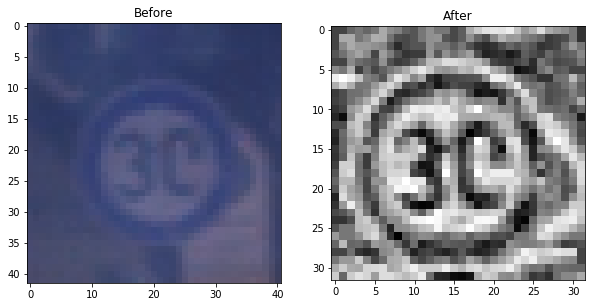

In [54]:
import numpy as np
index_val = list(set(np.random.randint(0, len(enhanced_images), 3)))

for row in range(len(index_val)):
    fig = plt.figure(figsize = (10, 30))
    plt_list = {'Before':images[index_val[row]], 'After':enhanced_images[index_val[row]]}
    
    for count, cols in enumerate(plt_list.keys()):
        fig.add_subplot(len(index_val), len(plt_list), count + 1)
        plt.title(cols)
        plt.imshow(plt_list[cols], cmap='gray')
        
    plt_list = {}
    plt.show()

In [8]:
from skimage.transform import resize
resized_images = []
for im in enhanced_images:
    resized_images.append(resize(im, (32,32),
                       anti_aliasing=False))

print('Resized '+str(len(resized_images))+' images successfully')

Resized 39209 images successfully


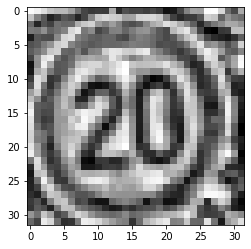

In [9]:
plt.imshow(resized_images[55],cmap='gray')

In [10]:
resized_images_array = np.array(resized_images, dtype='float')
labels_array = np.array(labels, dtype='int')  

print('Block ran without errors')

Block ran without errors


In [11]:
from datetime import datetime as dt
from skimage import color
from sklearn import svm
# current date and time
print("timestamp =", dt.fromtimestamp(dt.timestamp(dt.now())))

resized_unrolled_images = []
for i in resized_images_array:
    resized_unrolled_images.append(np.ravel(i))
print('Numpy ravel success')

print('This is training monitor status in Console')
resized_unrolled_images_array = np.array(resized_unrolled_images)
clf = svm.SVC(gamma='scale', verbose = 100)
clf.fit(resized_unrolled_images_array, labels_array)
print('SVM Model training success')

print("timestamp =", dt.fromtimestamp(dt.timestamp(dt.now())))

timestamp = 2019-06-03 00:03:56.323797
Numpy ravel success
This is training monitor status in Console
[LibSVM]SVM Model training success


NameError: name 'datetime' is not defined

In [12]:
clf.get_params()
from joblib import dump, load
dump(clf, 'clahe_32x32_5_class.joblib') 

['clahe_32x32_5_class.joblib']

In [13]:
tmp = resized_unrolled_images_array[300:500]
#clf.score(tmp,labels_array[300:500])
clf2 = load('clahe_32x32_5_class.joblib')
clf2.score(tmp,labels_array[300:500])

0.985

In [41]:
clf2.predict(resized_unrolled_images_array[25640].reshape(1,1024))

array([4])

In [25]:
test_size = 2000
ran = list(set(np.random.randint(0, len(resized_unrolled_images_array), test_size)))
clf2.score(resized_unrolled_images_array[ran],labels_array[ran])

0.9948927477017364

In [105]:
misclassified_images = []

for i in ran:
    if clf2.predict(resized_unrolled_images_array[i].reshape(1,1024)) != labels_array[i] :
        misclassified_images.append(images[i])  #resized_unrolled_images_array

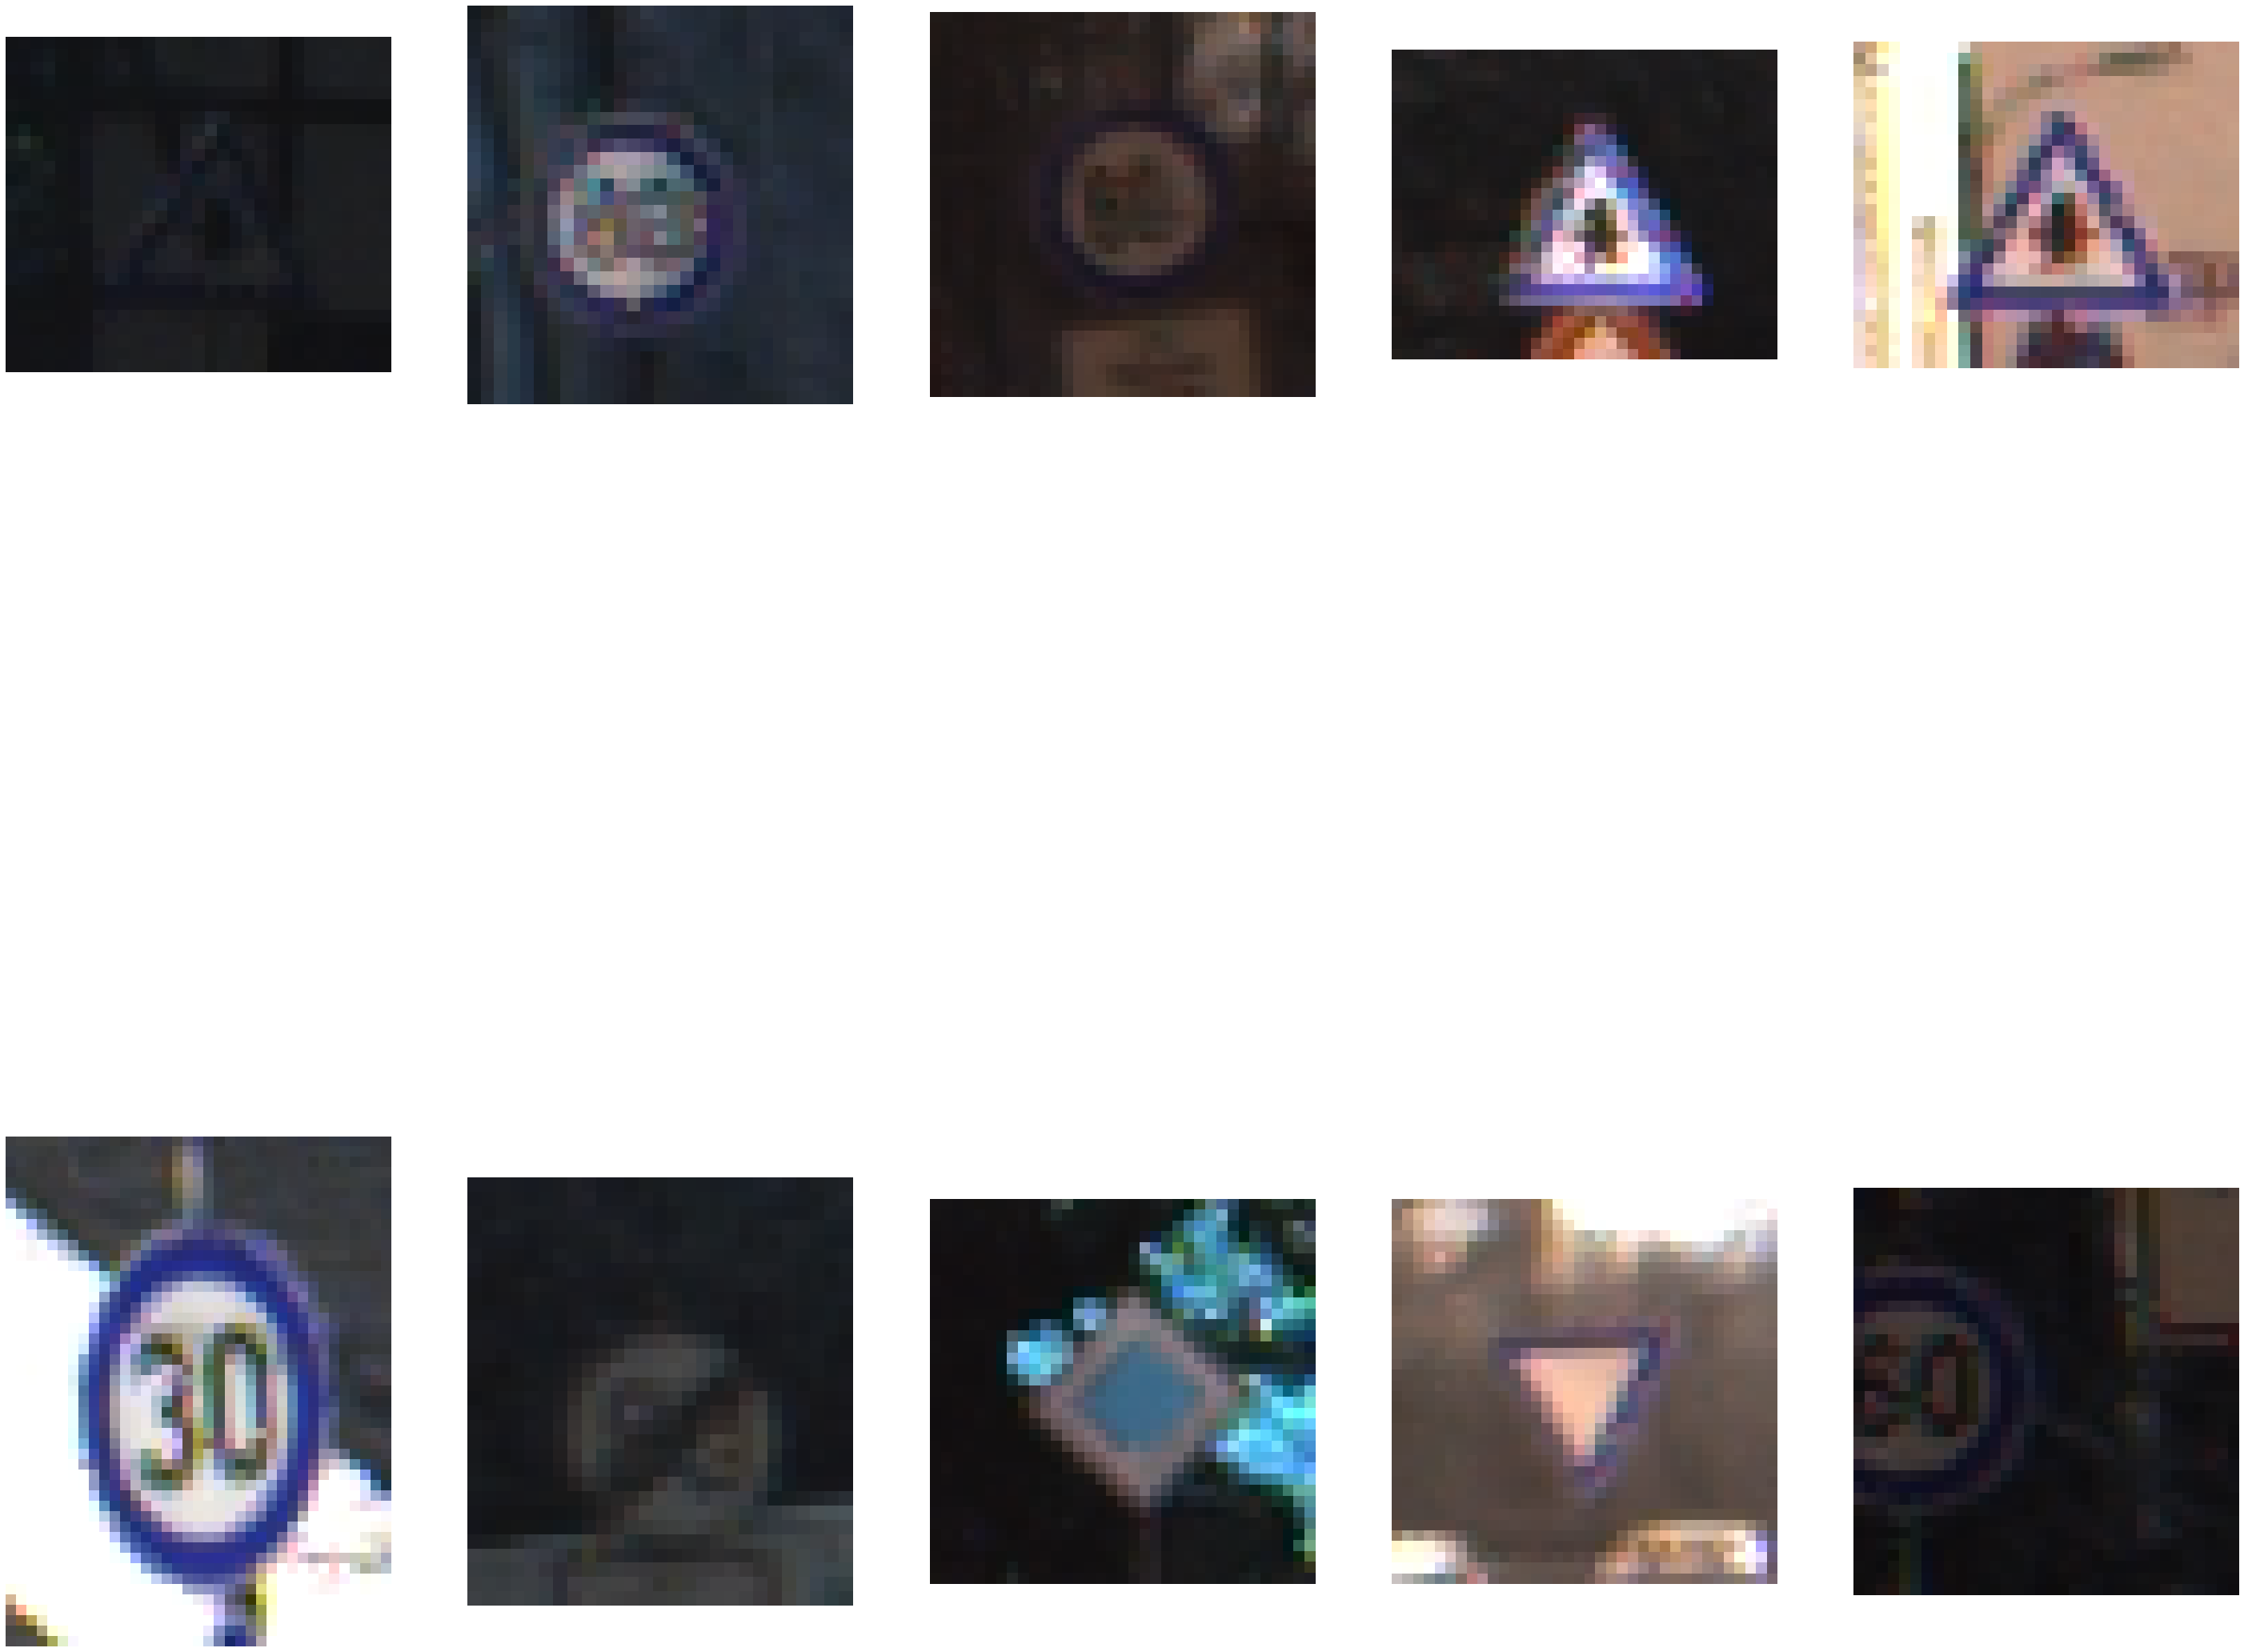

In [110]:
num = 0
plt.figure(figsize=(50,50))
for im in misclassified_images:
    plt.subplot(2,len(misclassified_images)/2,num+1)
    plt.axis('off')
    plt.imshow(im)
    #plt.imshow(im.reshape(32,32), cmap='gray')
    num+=1;

In [69]:
estimates = clf2.decision_function(resized_unrolled_images_array[25640].reshape(1,1024))
print(np.argmax(estimates))
print(estimates[0][np.argmax(estimates)])

4
4.291058079208176


In [94]:
#SLIDING WINDOW BLOCK

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from statistics import mode

clahe_detect = cv2.createCLAHE()

im = cv2.cvtColor(images[25640], cv2.COLOR_BGR2GRAY)
im = clahe.apply(im)

tmp = im 
array_edge = [10,15,20,25]
stepSize = 5
windows = []

for edge in array_edge:
    w_width = edge
    w_height = edge
    for x in range(0, im.shape[1] - w_width , stepSize):
        for y in range(0, im.shape[0] - w_height, stepSize):
            window = im[x:x + w_width, y:y + w_height]
            windows.append(resize(window, (32,32), anti_aliasing=False))
expected_classes_in_windows = []                                  
for window in windows:
    estimates = clf2.decision_function(resized_unrolled_images_array[25640].reshape(1,1024))
    expected_classes_in_windows.append(np.argmax(estimates))

print('predicted class :' + str(mode(expected_classes_in_windows)))

predicted class :4


In [99]:
print(len(labels))

39209
['1', '4', '3', '0', '2']


In [104]:
import collections
counter=collections.Counter(labels)
print(counter.most_common())

[('4', 20429), ('0', 13200), ('1', 2160), ('3', 2100), ('2', 1320)]
